In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%%time
# Resampling data from minute interval to day
bit_df = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-01-08.csv')
bit_df

Wall time: 1.08 s


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
1,1417412040,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
2,1417412100,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
3,1417412160,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
4,1417412220,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
...,...,...,...,...,...,...,...,...
1574269,1515369360,16174.21,16174.23,16174.21,16174.23,7.594119,122828.956770,16174.221301
1574270,1515369420,16174.23,16174.23,16174.21,16174.22,11.902468,192513.150940,16174.221081
1574271,1515369480,16174.22,16174.22,16174.21,16174.21,3.860840,62446.073684,16174.218136
1574272,1515369540,16174.22,16174.22,16174.21,16174.22,1.179093,19070.914509,16174.219514


In [3]:
%%time
# Convert unix time to datetime
bit_df['date'] = pd.to_datetime(bit_df.Timestamp, unit='s')
# Reset index
bit_df = bit_df.set_index('date')
# Rename columns so easier to code
bit_df = bit_df.rename(columns={'Open':'open', 'High': 'hi', 'Low': 'lo', 
                       'Close': 'close', 'Volume_(BTC)': 'vol_btc',
                       'Volume_(Currency)': 'vol_cur', 
                       'Weighted_Price': 'wp', 'Timestamp': 'ts'})
# Resample and only use recent samples that aren't missing
bit_df = bit_df.resample('d').agg({'open': 'first', 'hi': 'max', 
    'lo': 'min', 'close': 'last', 'vol_btc': 'sum',
    'vol_cur': 'sum', 'wp': 'mean', 'ts': 'min'}).iloc[-1000:]
# drop last row as it is not complete
bit_df = bit_df.iloc[:-1]

Wall time: 217 ms


In [4]:
bit_df.head()

,open,hi,lo,close,vol_btc,vol_cur,wp,ts
date,,,,,,,,
2015-04-15,221.05,224.52,218.09,224.35,9137.584626,2.029524e+06,222.270771,1.429056e+09
2015-04-16,224.35,230.75,223.66,229.45,8636.837666,1.970069e+06,227.779413,1.429142e+09
2015-04-17,229.45,230.08,220.46,223.62,7738.360003,1.741497e+06,224.970863,1.429229e+09
2015-04-18,223.55,224.04,222.18,224.02,5065.649127,1.131269e+06,223.398170,1.429315e+09
2015-04-19,224.02,226.72,223.44,224.03,5279.787312,1.185860e+06,224.667792,1.429402e+09


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score

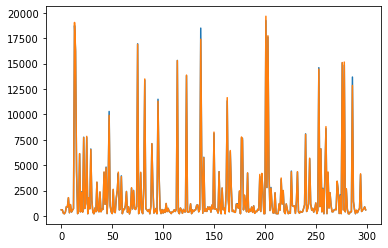

0.9992033658873103

In [31]:
x_col = ['hi',	'open','lo',	'vol_btc',	'vol_cur',	'wp']
y_col = 'close'

x = bit_df[x_col]
Y = bit_df[y_col]

scaler = StandardScaler().fit(x)
X  = scaler.transform(x)

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 5)

m1 = LinearRegression()
m1.fit(x_train,y_train)



pred1 = m1.predict(x_test)

plt.plot(pred1)
plt.plot(y_test.values)
plt.show()
m1.score(x_test,y_test) 

> Prediction of tmrw 

In [33]:
tmrw = bit_df.shift(30).tail(30)
tmrw.head()

,open,hi,lo,close,vol_btc,vol_cur,wp,ts
date,,,,,,,,
2017-12-09,7467.97,7470.01,7079.00,7156.00,17509.919783,1.266867e+08,7247.665142,1.510186e+09
2017-12-10,7156.00,7350.00,6426.00,6577.62,32791.171918,2.230231e+08,6966.398741,1.510272e+09
2017-12-11,6577.63,6894.99,6201.01,6346.70,24975.577100,1.616964e+08,6557.900280,1.510358e+09
2017-12-12,6346.64,6486.00,5511.11,5886.35,49610.285267,2.985255e+08,6097.406380,1.510445e+09
2017-12-13,5886.35,6841.45,5850.00,6535.87,35150.890526,2.245962e+08,6355.194349,1.510531e+09


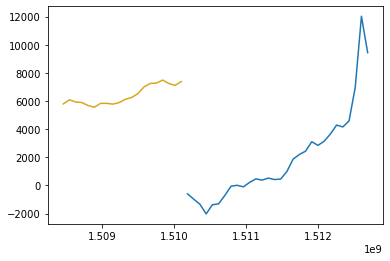

In [39]:
# scaler = StandardScaler().fit(x)
# X  = scaler.transform(x)
pred = m1.predict(StandardScaler().fit_transform(tmrw[x_col]))
pred
# plt.plot(bitcoin["Timestamp"][-400:-60], bitcoin["Weighted_Price"][-400:-60], color='goldenrod', lw=2)
plt.plot(bit_df['ts'][-80:-60],bit_df['wp'][-80:-60],color = 'goldenrod')
plt.plot(tmrw['ts'],pred)#pd.to_datetime(tmrw.ts,unit = 's')

Text(0, 0.5, '$ Price')

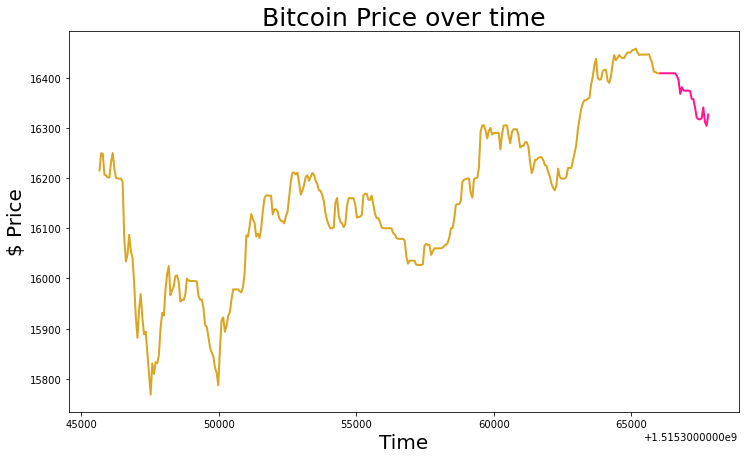

In [30]:
bitcoin = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-01-08.csv')
bitcoin
bitcoin['Dates'] = pd.to_datetime(bitcoin['Timestamp'], unit='s')
bitcoin.head()
bitcoin.dropna(inplace=True)
required_features = ['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']
output_label = 'Close'
x_train, x_test, y_train, y_test = train_test_split(
bitcoin[required_features],
bitcoin[output_label],
test_size = 0.3
)
model = LinearRegression()
model.fit(x_train, y_train)

future_set = bitcoin.shift(periods=30).tail(30)
prediction = model.predict(future_set[required_features])


plt.figure(figsize = (12, 7))
plt.plot(bitcoin["Timestamp"][-400:-60], bitcoin["Weighted_Price"][-400:-60], color='goldenrod', lw=2)
plt.plot(future_set["Timestamp"], prediction, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

Text(0, 0.5, '$ Price')

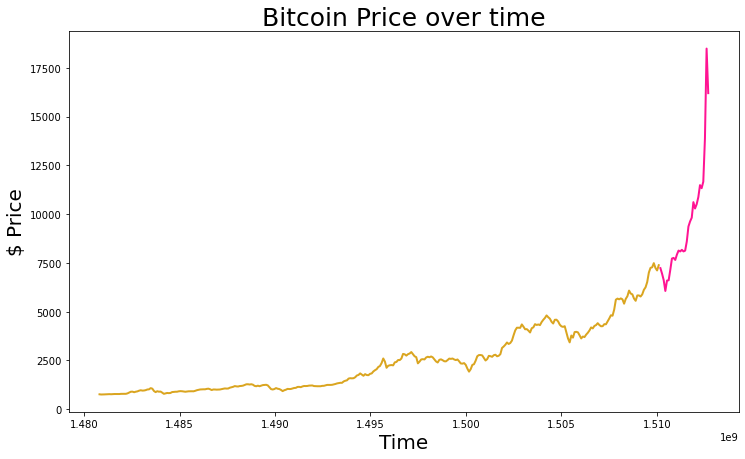

In [42]:
x_col = ['hi',	'open','lo',	'vol_btc',	'vol_cur',	'wp']
y_col = 'close'

x = bit_df[x_col]
Y = bit_df[y_col]

# scaler = StandardScaler().fit(x)
# X  = scaler.transform(x)
X=x

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 5)

m1 = LinearRegression()
m1.fit(x_train,y_train)


future_set = bit_df.shift(periods=30).tail(30)
fut_x = future_set[x_col]
# scaler = StandardScaler().fit(fut_x)
# X  = scaler.transform(fut_x)

prediction = m1.predict(fut_x)


plt.figure(figsize = (12, 7))
plt.plot(bit_df["ts"][-400:-60], bit_df["wp"][-400:-60], color='goldenrod', lw=2)
plt.plot(future_set["ts"], prediction, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

# pred1 = m1.predict(x_test)

# plt.plot(pred1)
# plt.plot(y_test.values)
# plt.show()
# # m1.score(x_test,y_test) 

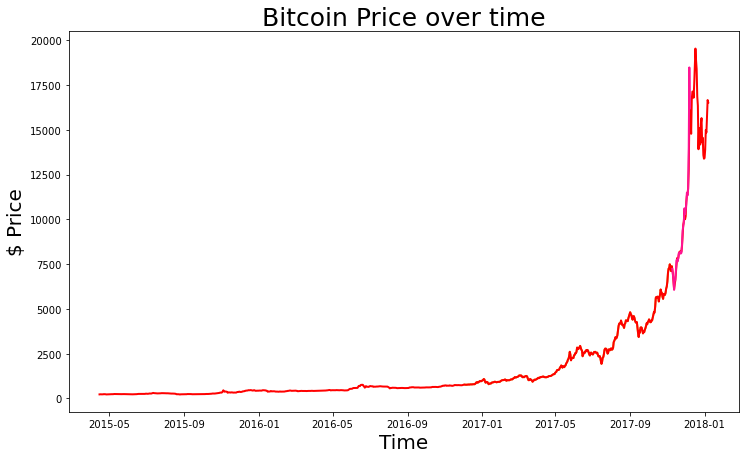

In [51]:
x_col = ['hi',	'open','lo',	'vol_btc',	'vol_cur',	'wp']
y_col = 'close'

x = bit_df[x_col]
Y = bit_df[y_col]

X=x

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 5)

m1 = LinearRegression()
m1.fit(x_train,y_train)


future_set = bit_df.shift(periods=30).tail(30)
fut_x = future_set[x_col]

prediction = m1.predict(fut_x)


plt.figure(figsize = (12, 7))
plt.plot(bit_df.index[-400:-60], bit_df["wp"][-400:-60], color='goldenrod', lw=2)
plt.plot(bit_df.index, bit_df["wp"], color='red', lw=2)
plt.plot( bit_df.index[-60:-30],prediction, color='deeppink', lw=2)#future_set.index
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

plt.show()

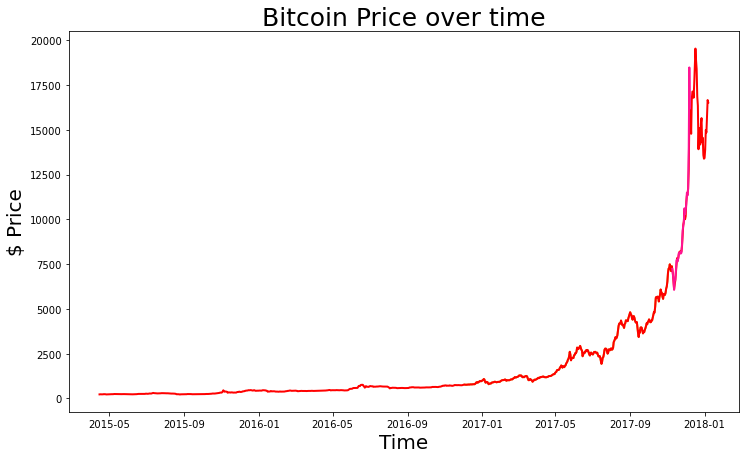

In [53]:
x_col = ['hi',	'open','lo',	'vol_btc',	'vol_cur',	'wp']
y_col = 'close'

x = bit_df[x_col]
Y = bit_df[y_col]

X=x

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 5)

m1 = LinearRegression()
m1.fit(x_train,y_train)


future_set = bit_df[['hi',	'open','lo',	'vol_btc',	'vol_cur',	'wp','close']].shift(periods=30).tail(30)
fut_x = future_set[x_col]

prediction = m1.predict(fut_x)


plt.figure(figsize = (12, 7))
plt.plot(bit_df.index[-400:-60], bit_df["wp"][-400:-60], color='goldenrod', lw=2)
plt.plot(bit_df.index, bit_df["wp"], color='red', lw=2)
plt.plot( bit_df.index[-60:-30],prediction, color='deeppink', lw=2)#future_set.index
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

plt.show()

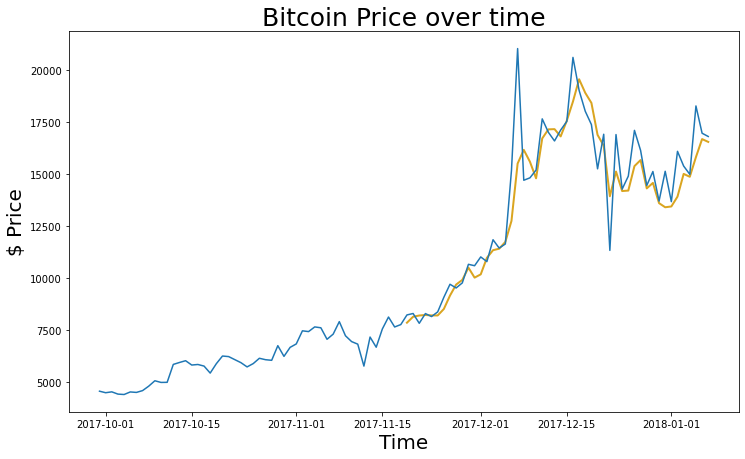

In [92]:
bit_df = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-01-08.csv')
bit_df

# %%time
# Convert unix time to datetime
bit_df['date'] = pd.to_datetime(bit_df.Timestamp, unit='s')
# Reset index
bit_df = bit_df.set_index('date')
# Rename columns so easier to code
bit_df = bit_df.rename(columns={'Open':'open', 'High': 'hi', 'Low': 'lo', 
                       'Close': 'close', 'Volume_(BTC)': 'vol_btc',
                       'Volume_(Currency)': 'vol_cur', 
                       'Weighted_Price': 'wp', 'Timestamp': 'ts'})
# Resample and only use recent samples that aren't missing
bit_df = bit_df.resample('d').agg({'open': 'first', 'hi': 'max', 
    'lo': 'min', 'close': 'last', 'vol_btc': 'sum',
    'vol_cur': 'sum', 'wp': 'mean', 'ts': 'min'}).iloc[-1000:]
# drop last row as it is not complete
bit_df = bit_df.iloc[:-1]
bit_df ['date'] = bit_df.index
bit_df.reset_index(inplace=True,drop=True)
bit_df

x_col = ['hi',	'open','lo',	'vol_btc',	'vol_cur',	'wp']
y_col = 'close'
bit_df['close_tm'] = bit_df[y_col].shift(periods = -5)
y_col = 'close_tm'
x = bit_df[x_col][:-5]
Y = bit_df[y_col][:-5]

X=x

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 5)

m1 = LinearRegression()
m1.fit(x_train,y_train)


future_set = bit_df.tail(100)#bit_df[['hi',	'open','lo',	'vol_btc',	'vol_cur',	'wp','close']].shift(periods=30).
fut_x = future_set[x_col]

prediction = m1.predict(fut_x)


plt.figure(figsize = (12, 7))
plt.plot(bit_df.date[-50:], bit_df["wp"][-50:], color='goldenrod', lw=2)
# plt.plot(bit_df.date, bit_df["wp"], color='red', lw=2)
plt.plot(pd.date_range(start = bit_df.date.iloc[-100],periods=100),prediction)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

plt.show()

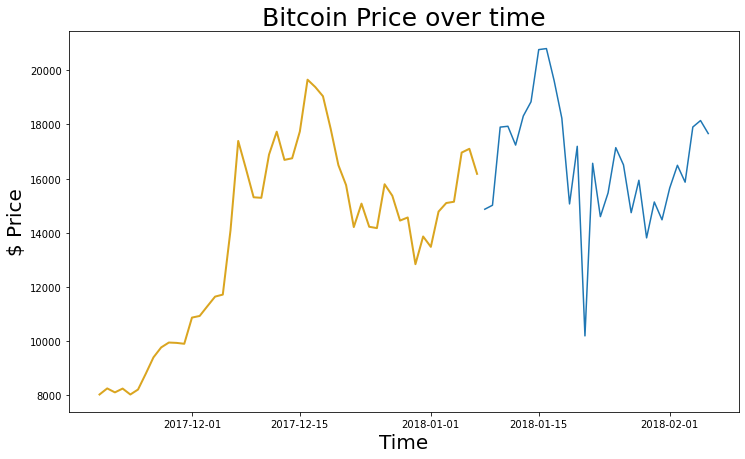

In [137]:
bit_df = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-01-08.csv')
bit_df

# %%time
# Convert unix time to datetime
bit_df['date'] = pd.to_datetime(bit_df.Timestamp, unit='s')
# Reset index
bit_df = bit_df.set_index('date')
# Rename columns so easier to code
bit_df = bit_df.rename(columns={'Open':'open', 'High': 'hi', 'Low': 'lo', 
                       'Close': 'close', 'Volume_(BTC)': 'vol_btc',
                       'Volume_(Currency)': 'vol_cur', 
                       'Weighted_Price': 'wp', 'Timestamp': 'ts'})
# Resample and only use recent samples that aren't missing
bit_df = bit_df.resample('d').agg({'open': 'first', 'hi': 'max', 
    'lo': 'min', 'close': 'last', 'vol_btc': 'sum',
    'vol_cur': 'sum', 'wp': 'mean', 'ts': 'min'}).iloc[-1000:]
# drop last row as it is not complete
bit_df = bit_df.iloc[:-1]
bit_df ['date'] = bit_df.index
bit_df.reset_index(inplace=True,drop=True)
bit_df

x_col = ['hi',	'lo',	'open','vol_btc',	'vol_cur',	'wp']#'open'
y_col = 'close'
bit_df['close_tm'] = bit_df[y_col].shift(periods = -10)
y_col = 'close_tm'
x = bit_df[x_col][:-10]
Y = bit_df[y_col][:-10]
# scaler = StandardScaler().fit(x)
# X  = scaler.transform(x)
# scaler = MinMaxScaler().fit(x)
# X  = scaler.transform(x)
X=x
# X=x

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 5)

m1 = LinearRegression()
m1.fit(x_train,y_train)


future_set = bit_df.tail(30)#bit_df[['hi',	'open','lo',	'vol_btc',	'vol_cur',	'wp','close']].shift(periods=30).
fut_x = future_set[x_col]
# scaler = StandardScaler().fit(fut_x)
# fut_x  = scaler.transform(fut_x)
# scaler = MinMaxScaler().fit(fut_x)
# fut_x  = scaler.transform(fut_x)

prediction = m1.predict(fut_x)


plt.figure(figsize = (12, 7))
plt.plot(bit_df.date[-50:], bit_df["close"][-50:], color='goldenrod', lw=2)
# plt.plot(bit_df.date, bit_df["wp"], color='red', lw=2)
plt.plot(pd.date_range(start = bit_df.date.iloc[-20],periods=60,freq = 'D')[-30:],prediction)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

plt.show()

In [113]:
bit_df[y_col].shift(periods = -30)

0      224.35
1      229.45
2      223.62
3      224.02
4      224.03
        ...  
994       NaN
995       NaN
996       NaN
997       NaN
998       NaN
Name: close_tm, Length: 999, dtype: float64

In [90]:
from sklearn.preprocessing import MinMaxScaler

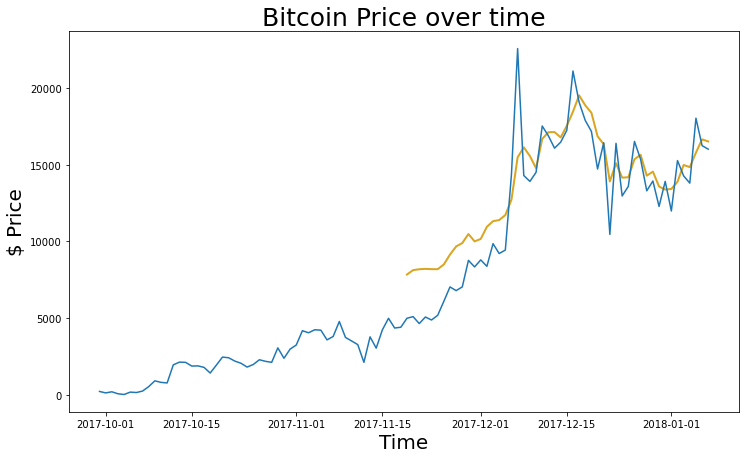

In [97]:
bit_df = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-01-08.csv')
bit_df

# %%time
# Convert unix time to datetime
bit_df['date'] = pd.to_datetime(bit_df.Timestamp, unit='s')
# Reset index
bit_df = bit_df.set_index('date')
# Rename columns so easier to code
bit_df = bit_df.rename(columns={'Open':'open', 'High': 'hi', 'Low': 'lo', 
                       'Close': 'close', 'Volume_(BTC)': 'vol_btc',
                       'Volume_(Currency)': 'vol_cur', 
                       'Weighted_Price': 'wp', 'Timestamp': 'ts'})
# Resample and only use recent samples that aren't missing
bit_df = bit_df.resample('d').agg({'open': 'first', 'hi': 'max', 
    'lo': 'min', 'close': 'last', 'vol_btc': 'sum',
    'vol_cur': 'sum', 'wp': 'mean', 'ts': 'min'}).iloc[-1000:]
# drop last row as it is not complete
bit_df = bit_df.iloc[:-1]
bit_df ['date'] = bit_df.index
bit_df.reset_index(inplace=True,drop=True)
bit_df

x_col = ['hi',	'open','lo',	'vol_btc',	'vol_cur',	'wp']
y_col = 'close'
bit_df['close_tm'] = bit_df[y_col].shift(periods = -5)
y_col = 'close_tm'
x = bit_df[x_col][:-5]
Y = bit_df[y_col][:-5]
# scaler = StandardScaler().fit(x)
# X  = scaler.transform(x)
scaler = MinMaxScaler().fit(x)
X  = scaler.transform(x)
# X=x
# X=x

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 5)

m1 = LinearRegression()
m1.fit(x_train,y_train)


future_set = bit_df.tail(100)#bit_df[['hi',	'open','lo',	'vol_btc',	'vol_cur',	'wp','close']].shift(periods=30).
fut_x = future_set[x_col]
# scaler = StandardScaler().fit(fut_x)
# fut_x  = scaler.transform(fut_x)
scaler = MinMaxScaler().fit(fut_x)
fut_x  = scaler.transform(fut_x)

prediction = m1.predict(fut_x)


plt.figure(figsize = (12, 7))
plt.plot(bit_df.date[-50:], bit_df["wp"][-50:], color='goldenrod', lw=2)
# plt.plot(bit_df.date, bit_df["wp"], color='red', lw=2)
plt.plot(pd.date_range(start = bit_df.date.iloc[-100],periods=100),prediction)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

plt.show()